In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV version:", cv2.__version__)
print("CUDA GPU Available:", cv2.cuda.getCudaEnabledDeviceCount() > 0)

OpenCV version: 4.10.0
CUDA GPU Available: False


In [39]:
import torch
print(torch.cuda.is_available())

True


In [2]:
def get_image(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img
    

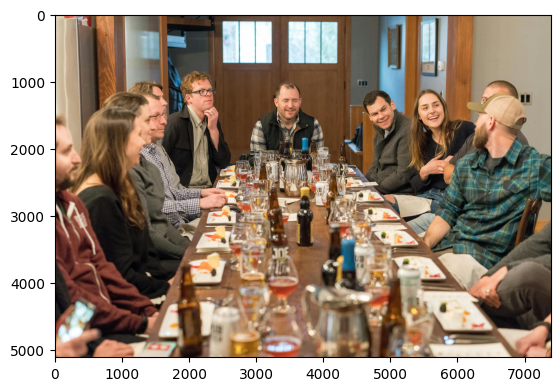

In [20]:

filename = 'c.jpg'
image = get_image(filename)


In [21]:
def edge_mask(image,line_size,blur):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur)
    
    edges= cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur)
    return edges

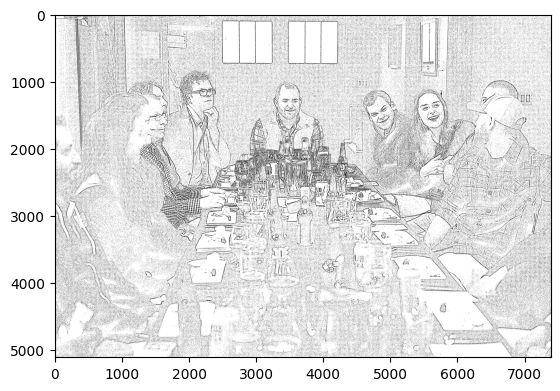

In [22]:
line_size = 11
blur = 5
edg = edge_mask(image,line_size,blur)
plt.imshow(edg,cmap='gray')

In [40]:
def quant(img, k):
    data= np.float32(img).reshape((-1,3))
    
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001) 
    
    ret ,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result    

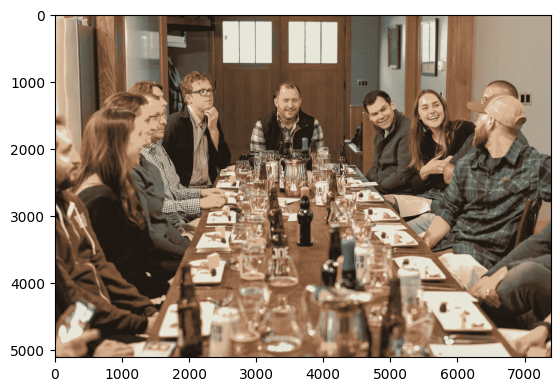

In [46]:
img = quant(image, 8)
plt.imshow(img)

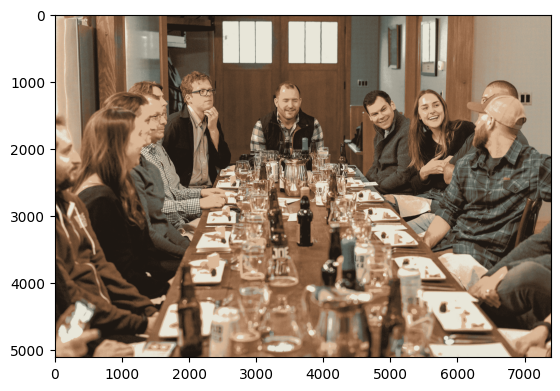

In [47]:
blur = cv2.bilateralFilter(img, d=5, sigmaColor=300, sigmaSpace=200)
plt.imshow(blur)

In [48]:
def cartoon():
    c = cv2.bitwise_and(blur,blur,mask=edg)
    plt.imshow(c)

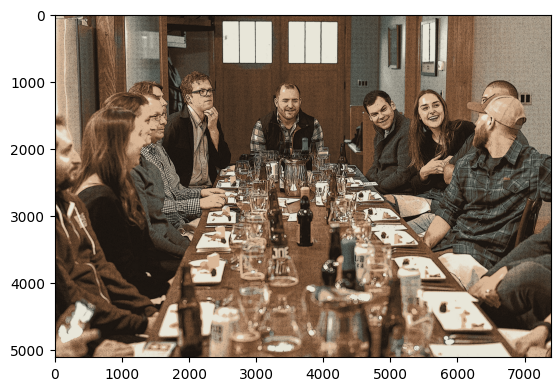

In [49]:
cartoon()